In [1]:
import glob

import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

import plotly.express as px
import plotly.graph_objects as go

In [2]:
columns = ['Algorithm','Construct','Threads','Size','Cutoff','Duration']
df = pd.concat([
    pd.read_csv(file, names=columns)
    for file in glob.glob('results/*.csv')
])

# data saving error
df.loc[df.Construct == 'serial', 'Cutoff'] = 0

In [3]:
df

,Algorithm,Construct,Threads,Size,Cutoff,Duration
0,merge,serial,1,1000,0,0.000203
1,merge,serial,1,1000,0,0.000163
2,merge,serial,1,1000,0,0.000177
3,merge,serial,1,1000,0,0.000148
4,merge,serial,1,1000,0,0.000156
...,...,...,...,...,...,...
620,quick,sections,16,10000000,1000,2.138845
621,quick,tasks,16,10000000,1000,0.344319
622,quick,sections,16,10000000,1000,2.168916
623,quick,tasks,16,10000000,1000,0.342963


std       mean
Algorithm   Threads Cutoff Size                         
enumeration 1       0      1000      0.000773   0.003456
                           10000     0.017345   0.236645
                           100000    0.042257  23.801274
merge       1       0      1000      0.000022   0.000169
                           10000     0.000015   0.001178
...                                       ...        ...
quick       16      1000   1000      0.000004   0.000128
                           10000     0.000040   0.000501
                           100000    0.000234   0.005376
                           1000000   0.002354   0.042147
                           10000000  0.002541   0.343259

[133 rows x 2 columns]

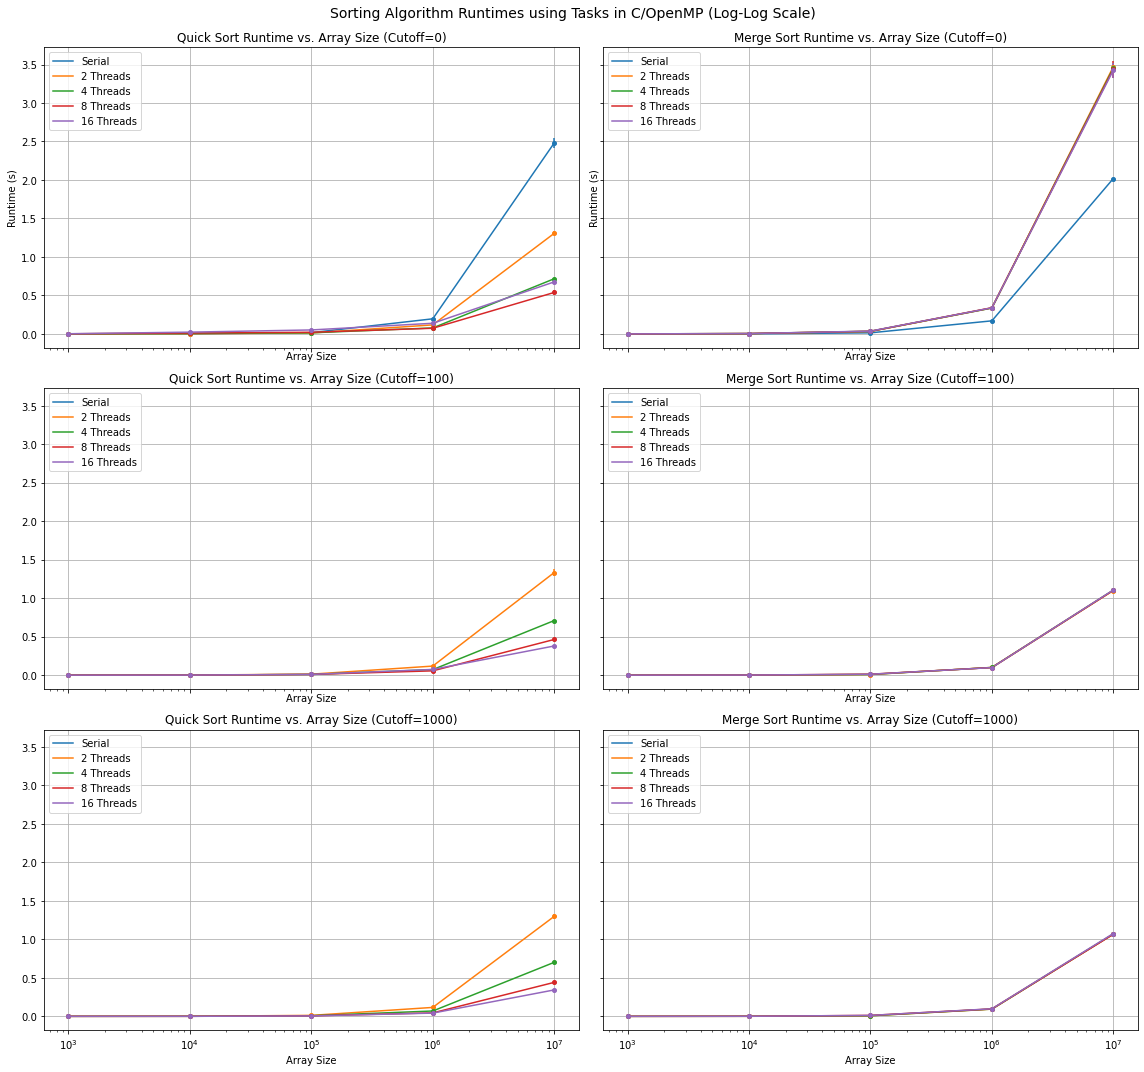

In [36]:
# fig = plt.figure(figsize=(20, 12))
nrows, ncols = 3, 2
fig, axes = plt.subplots(nrows, ncols, figsize=(16,5*nrows), sharex=True, sharey=True)

data_df = (
    df.loc[
        (df.Construct.isin(('serial','tasks'))),
        ['Algorithm', 'Threads', 'Cutoff', 'Size', 'Duration']
    ]
    .groupby(['Algorithm','Threads', 'Cutoff', 'Size'])['Duration']
    .agg({'mean', 'std'})
)

for i, algorithm in enumerate(('quick', 'merge')):
    for j, cutoff in enumerate(data_df.index.get_level_values('Cutoff').unique()):
        ax = axes[j, i]
        ax.set_title(f'{algorithm.title()} Sort Runtime vs. Array Size (Cutoff={cutoff})')

        # plot data
        for k, n_threads in enumerate(data_df.index.get_level_values('Threads').unique()):
            data = data_df.loc[
                (data_df.index.get_level_values('Algorithm') == algorithm) &
                (data_df.index.get_level_values('Threads') == n_threads) &
                (data_df.index.get_level_values('Cutoff') == cutoff)
            ].reset_index(['Algorithm','Threads','Cutoff'], drop=True)

            array_sizes = data_df.index.get_level_values('Size').unique()

            color=list(mcolors.TABLEAU_COLORS)[k]
            label = f'{n_threads} Threads' if n_threads != 1 else 'Serial'
            ax.plot(data.index, data['mean'], label=label, color=color)
            ax.errorbar(data.index, data['mean'], yerr=data['std'] , fmt='o', markersize=4, color=color)

        if j == 0:
            ax.set_ylabel('Runtime (s)')
        ax.legend(loc='upper left')

        ax.set_xlabel('Array Size')
        ax.set_xscale('log')
#         ax.set_yscale('log')
        ax.grid()

fig.suptitle('Sorting Algorithm Runtimes using Tasks in C/OpenMP (Log-Log Scale)', y=0.99, fontsize=14)
fig.tight_layout()
fig.show()

In [40]:
data_df.loc[
    (data_df.index.get_level_values('Algorithm') == algorithm) &
#     (data_df.index.get_level_values('Threads')n_threads) &
    (data_df.index.get_level_values('Cutoff') == cutoff)
]

std      mean
Algorithm Threads Cutoff Size                        
merge     2       1000   1000      0.000003  0.000147
                         10000     0.000002  0.000636
                         100000    0.000218  0.007831
                         1000000   0.000605  0.093869
                         10000000  0.003426  1.067789
          4       1000   1000      0.000008  0.000074
                         10000     0.000021  0.000954
                         100000    0.000136  0.007742
                         1000000   0.003087  0.094362
                         10000000  0.004687  1.070471
          8       1000   1000      0.000001  0.000070
                         10000     0.000019  0.000977
                         100000    0.000992  0.012247
                         1000000   0.004382  0.096264
                         10000000  0.002868  1.066322
          16      1000   1000      0.000001  0.000070
                         10000     0.000107  0.000894
                         100000    0.001106  0.012294
                         1000000   0.004306  0.098142
                         10000000  0.015966  1.076145

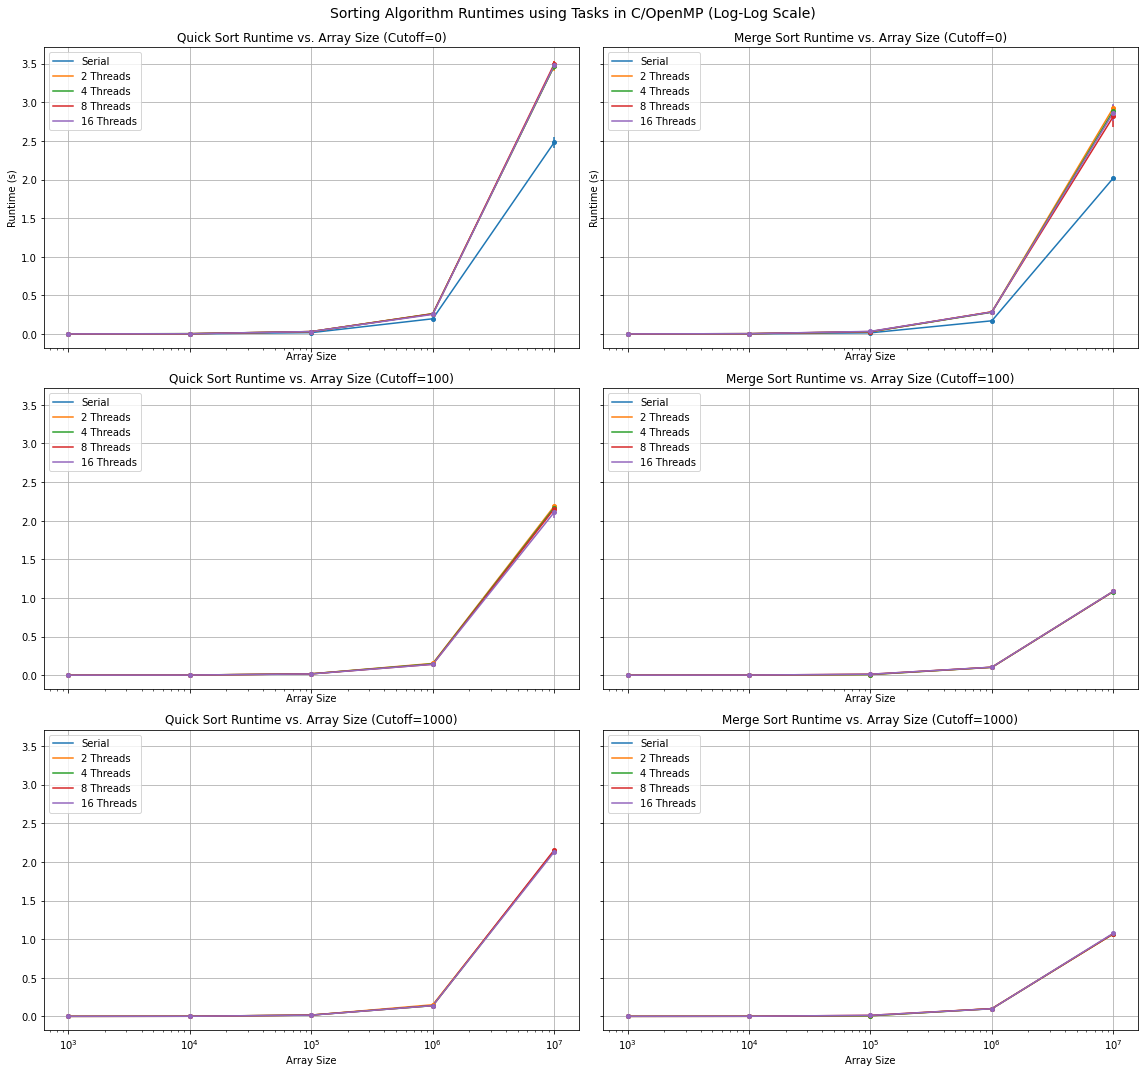

In [35]:
# fig = plt.figure(figsize=(20, 12))
nrows, ncols = 3, 2
fig, axes = plt.subplots(nrows, ncols, figsize=(16,5*nrows), sharex=True, sharey=True)

data_df = (
    df.loc[
        (df.Construct.isin(('serial','sections'))),
        ['Algorithm', 'Threads', 'Cutoff', 'Size', 'Duration']
    ]
    .groupby(['Algorithm','Threads', 'Cutoff', 'Size'])['Duration']
    .agg({'mean', 'std'})
)

for i, algorithm in enumerate(('quick', 'merge')):
    for j, cutoff in enumerate(data_df.index.get_level_values('Cutoff').unique()):
        ax = axes[j, i]
        ax.set_title(f'{algorithm.title()} Sort Runtime vs. Array Size (Cutoff={cutoff})')

        # plot data
        for k, n_threads in enumerate(data_df.index.get_level_values('Threads').unique()):
            data = data_df.loc[
                (data_df.index.get_level_values('Algorithm') == algorithm) &
                (data_df.index.get_level_values('Threads') == n_threads) &
                (data_df.index.get_level_values('Cutoff') == cutoff)
            ].reset_index(['Algorithm','Threads','Cutoff'], drop=True)

            array_sizes = data_df.index.get_level_values('Size').unique()

            color=list(mcolors.TABLEAU_COLORS)[k]
            label = f'{n_threads} Threads' if n_threads != 1 else 'Serial'
            ax.plot(data.index, data['mean'], label=label, color=color)
            ax.errorbar(data.index, data['mean'], yerr=data['std'] , fmt='o', markersize=4, color=color)

        if j == 0:
            ax.set_ylabel('Runtime (s)')
        ax.legend(loc='upper left')

        ax.set_xlabel('Array Size')
        ax.set_xscale('log')
#         ax.set_yscale('log')
        ax.grid()

fig.suptitle('Sorting Algorithm Runtimes using Tasks in C/OpenMP (Log-Log Scale)', y=0.99, fontsize=14)
fig.tight_layout()
fig.show()

### Plotly Figures

In [ ]:
fig = go.Figure(
    layout={
        'title': {
            'text': 'Quick Sort Algorithm Runtime'
        }
    }
)

fig.add_trace(
    go.Scatter(
        x=thread2.index.get_level_values('Size').values,
        y=thread2['mean'].values,
        name='Line',
        error_y=dict(
            type='data',
            symmetric=False,
            array=thread2['max'].values - thread2['mean'].values,
            arrayminus=thread2['mean'].values - thread2['min'].values
        ),
        fillcolor='red'
    )
)
fig.update_yaxes(type="log")
fig.show()

In [20]:
fig = px.box(
    df,
    y='Duration', x='Algorithm', color='Size',
    facet_col='Cutoff', facet_col_wrap=3,
    facet_row='Construct',
    template='seaborn',
    log_y=True, 
    height=800,
#     boxmode="overlay",
    points='all',
    title='C Sorting Algorithm Runtimes',
    labels={
        "Duration": "Duration (s)",
        "Algorithm": "Sorting Algorithm",
     },
)

fig.update_xaxes(showgrid=True, gridwidth=2)#, gridcolor='LightPink')
fig.update_yaxes(showgrid=True, gridwidth=2)#, gridcolor='LightPink')

# for (algorithm, size) in means.index:
# for algorithm in means.index.get_level_values('Algorithm').unique():
#     trace = go.Scatter(means.loc[algorithm], y=)
#     fig.add_line(x=)
    # fig.add_line(x='Algorithm', y=, name="Last year")

fig.show()

In [23]:
fig = px.line(
    df,
    y='Duration', x='Size', color='Algorithm',
    facet_col='Cutoff', facet_col_wrap=3,
    facet_row='Construct',
    template='seaborn',
    log_y=True, 
    height=800,
    title='C Sorting Algorithm Runtimes',
    labels={
        "Duration": "Duration (s)",
        "Algorithm": "Sorting Algorithm",
     },
)

fig.update_xaxes(showgrid=True, gridwidth=2)#, gridcolor='LightPink')
fig.update_yaxes(showgrid=True, gridwidth=2)#, gridcolor='LightPink')

# for (algorithm, size) in means.index:
# for algorithm in means.index.get_level_values('Algorithm').unique():
#     trace = go.Scatter(means.loc[algorithm], y=)
#     fig.add_line(x=)
    # fig.add_line(x='Algorithm', y=, name="Last year")

fig.show()